# **A - Introduction**



In this comprehensive project, I aim to leverage the predictive power of two robust machine learning models: the Support Vector Machine (SVM) and the Artificial Neural Network (ANN). The primary objective is to create a predictive system for discerning whether a patient may be susceptible to heart failure.

**Dataset Information**

Our dataset is sourced from Kaggle and holds immense significance in the broader context of global health. Cardiovascular diseases (CVDs) stand as the leading cause of mortality worldwide, claiming a staggering 17.9 million lives annually, equating to a distressing 31% of all global fatalities. Among CVDs, heart failure emerges as a widespread and life-threatening condition.

The dataset itself is a treasure trove of information, encompassing 12 distinctive features that offer invaluable insights. These features will be harnessed to construct a predictive model capable of assessing the risk of heart failure mortality in patients.


# **B - Discover**

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Essential Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

**Download Dataset**

In [3]:
# Download data
("https://drive.google.com/uc?export=download&id=1JAiHBnM2g-yvo_GCnNyWF591m5uCQpIC")

'https://drive.google.com/uc?export=download&id=1JAiHBnM2g-yvo_GCnNyWF591m5uCQpIC'

**Load the Data**

In [4]:
df = pd.read_csv('/content/drive/My Drive/Dataset/heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Exploratory Data Analysis

[Text(0, 0, '203'), Text(0, 0, '96')]

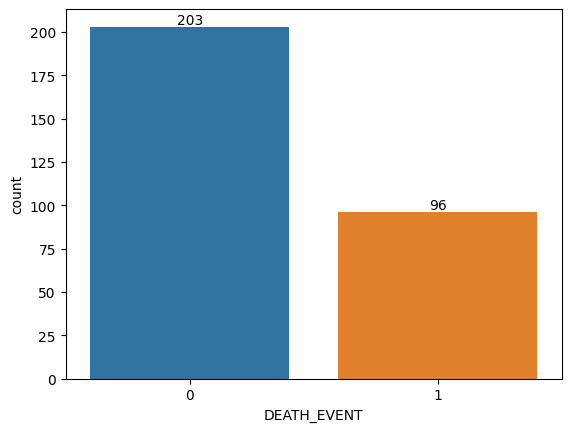

In [6]:
ax = sns.countplot(x = df["DEATH_EVENT"])
ax.bar_label(ax.containers[0])

<Axes: >

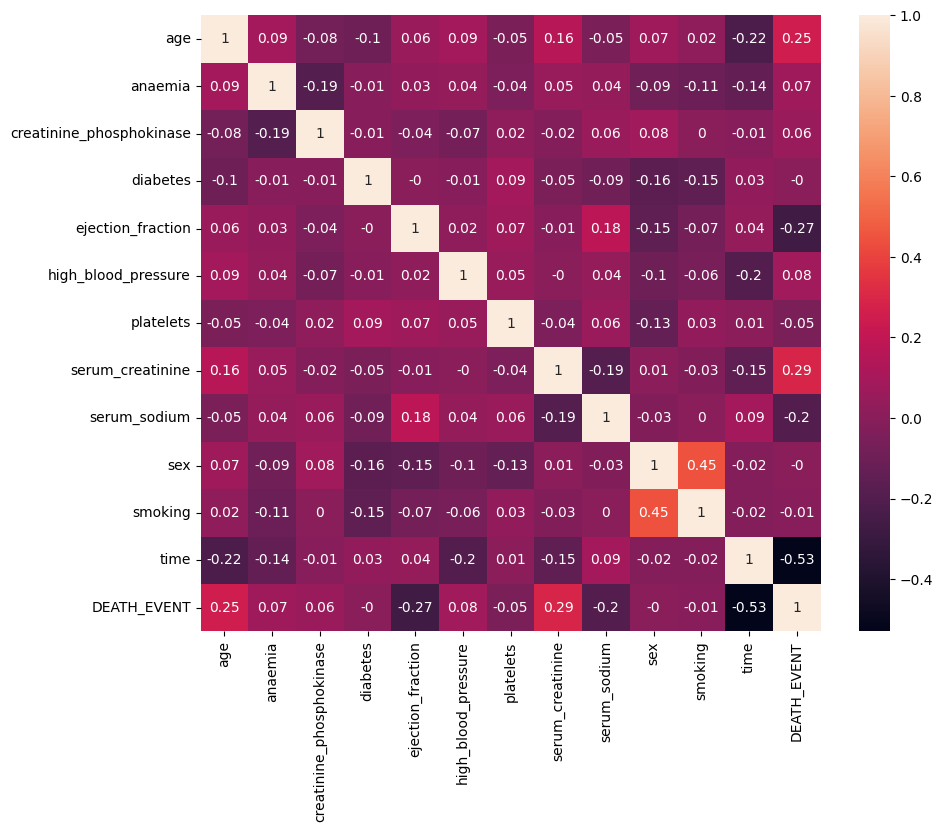

In [7]:
corr_mat = df.corr().round(2)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True)

## Selected Features

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select features with a correlation threshold (e.g., 0.1)
correlation_threshold = 0.1
selected_features = correlation_matrix[abs(correlation_matrix['DEATH_EVENT']) > correlation_threshold].index

# Create a new DataFrame with selected features
selected_df = df[selected_features]

# Display the selected features
print(selected_features)

Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time',
       'DEATH_EVENT'],
      dtype='object')


**Distribution Features**

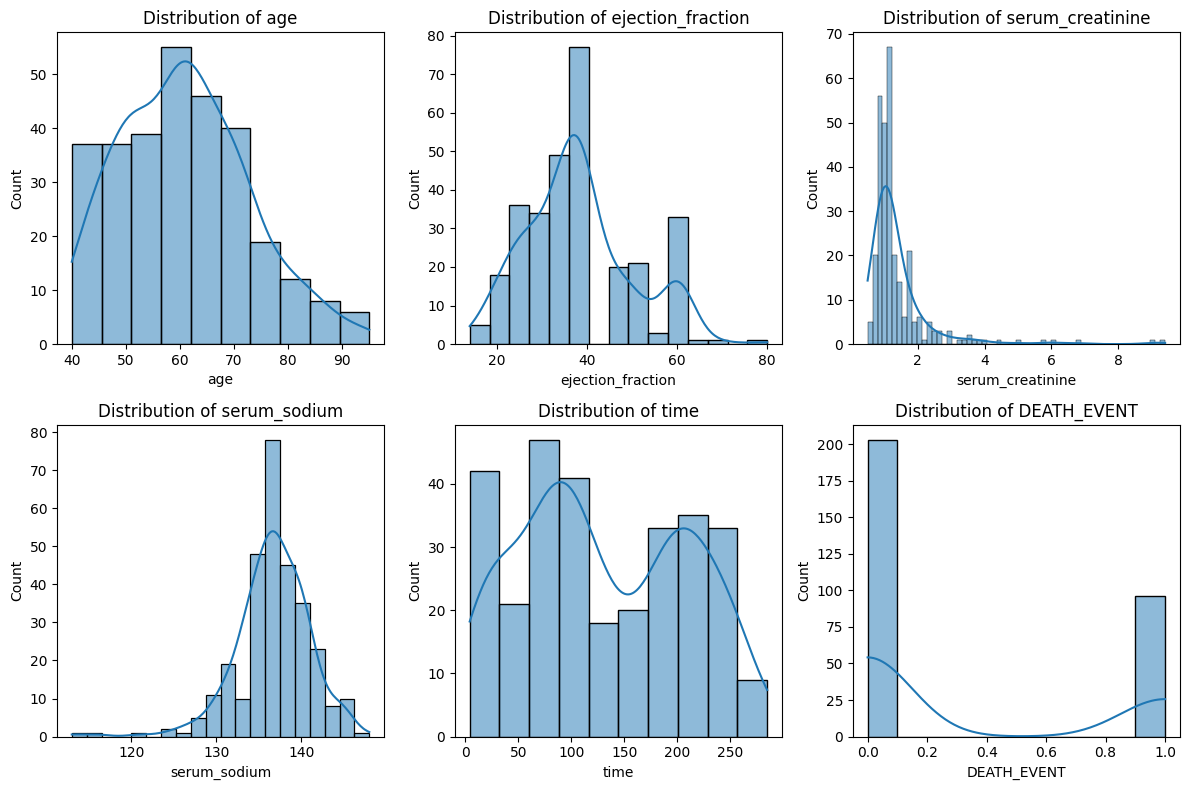

In [9]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create subplots for each selected feature
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns of subplots
    sns.histplot(data=selected_df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# C - Create Model

**Data Splitting**

In [10]:
X = df[selected_features].drop('DEATH_EVENT', axis=1)  # Features
y = df['DEATH_EVENT']  # Target variable

# Split the data into training and testing sets (e.g., 80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## SVM Training

In [11]:
# Create an SVM model (you can specify the kernel, e.g., kernel='linear')
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

## SVM Model Evaluation

In [12]:
# SVM Model Evaluation

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60


Confusion Matrix:
 [[33  2]
 [10 15]]


## ANN Training

In [17]:
# Create an ANN model
ann_model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model on the training data
ann_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
8/8 [==============================] - 2s 4ms/step - loss: 1.3194 - accuracy: 0.7615
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.7518 - accuracy: 0.7992
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4663 - accuracy: 0.8410
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4128 - accuracy: 0.8494
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4045 - accuracy: 0.8619
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4272 - accuracy: 0.8536
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3406 - accuracy: 0.8661
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3279 - accuracy: 0.8828
Epoch 9/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3462 - accuracy: 0.8661
Epoch 10/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3521 - accuracy: 0.8870
Epoch 11/50
8/8 [======================

## ANN Model Evaluation

In [18]:
# Evaluate the model
loss, accuracy = ann_model.evaluate(X_test, y_test)

# Display evaluation results
print("Loss:", loss)
print("Accuracy:", accuracy)

2/2 [==============================] - 0s 9ms/step - loss: 0.5011 - accuracy: 0.7500
Loss: 0.5011039972305298
Accuracy: 0.75


# D - Conclusion

I began by exploring the 12 original features to understand their relation to heart failure. I then chose the top 5 features for both SVM and ANN models and evaluated their performance. Based on these evaluations, here are the conclusions:

**Support Vector Machine Model:**
- Accuracy: 0.80
- Precision for class 0: 0.77, Recall for class 0: 0.94
- Precision for class 1: 0.88, Recall for class 1: 0.60

The SVM model achieved an accuracy of 0.80 and performed relatively well in classifying the data into "Death Event" (1) and "No Death Event" (0). It had high precision and recall for class 0, indicating that it correctly identified most of the non-death events. However, the recall for class 1 was lower, suggesting that it missed some of the death events.

**Artificial Neural Network Model:**
- Accuracy: 0.75
- Loss: 0.50

The ANN model achieved an accuracy of approximately 0.767 and had a loss of 0.4705. The model performed well but had a slightly lower accuracy compared to the SVM model.

In conclusion, the SVM model achieved a slightly higher accuracy and performed well in classifying the dataset. However, the choice between the SVM and ANN models may depend on various factors, including the specific use case, the importance of precision and recall for each class, and the computational resources available. Both models have shown good performance and can be considered for different scenarios.